In [79]:
##Librería estándar
import numpy as np
##Libería necesaria para graficar
import matplotlib.pyplot as plt
##Librería necesaria para usar los valores de las ctes de Planck, Boltzmann y vel de la luz.
import scipy.constants as cte

%matplotlib inline

In [80]:
##Se llaman los valores de las constantes de Boltzmann, Planck y la velocidad de la luz
k=cte. Boltzmann
h=cte. Planck
c=cte. c
print(h,k,c)

6.62607004e-34 1.38064852e-23 299792458.0


In [81]:
##Se leen los parámetros iniciales de un documento de texto
info=np.loadtxt('IRCF.txt').T

In [82]:
##Se leen los datos de cada columna del documento IRCF.txt
Frecuencia=info[0]
Espectro=info[1]
##Convierto Megas en Kilo Jankys
Incertidumbre=info[3]
Incertidumbre*=1e-3
print (Frecuencia,Espectro,Incertidumbre)

[ 2.27  2.72  3.18  3.63  4.08  4.54  4.99  5.45  5.9   6.35  6.81  7.26
  7.71  8.17  8.62  9.08  9.53  9.98 10.44 10.89 11.34 11.8  12.25 12.71
 13.16 13.61 14.07 14.52 14.97 15.43 15.88 16.34 16.79 17.24 17.7  18.15
 18.61 19.06 19.51 19.97 20.42 20.87 21.33] [200.723 249.508 293.024 327.77  354.081 372.079 381.493 383.478 378.901
 368.833 354.063 336.278 316.076 293.924 271.432 248.239 225.94  204.327
 183.262 163.83  145.75  128.835 113.568  99.451  87.036  75.876  65.766
  57.008  49.223  42.267  36.352  31.062  26.58   22.644  19.255  16.391
  13.811  11.716   9.921   8.364   7.087   5.801   4.523] [0.014 0.019 0.025 0.023 0.022 0.021 0.018 0.018 0.016 0.014 0.013 0.012
 0.011 0.01  0.011 0.012 0.014 0.016 0.018 0.022 0.022 0.023 0.023 0.023
 0.022 0.021 0.02  0.019 0.019 0.019 0.021 0.023 0.026 0.028 0.03  0.032
 0.033 0.035 0.041 0.055 0.088 0.155 0.282]


In [83]:
#Variables x para el error
x=0
xg=4000
#Temperatura del universo=0
t_universo=0
y=np.linspace(0,0,len(Incertidumbre))
#Se crean invervalos para valores de Incertidumbre para el error
error=np.linspace(0,0,len(Incertidumbre))
#Arreglo para calcular la temperatura
T=np.linspace(1,5,100)

Text(0,0.5,'Espectro (MJy/sr)')

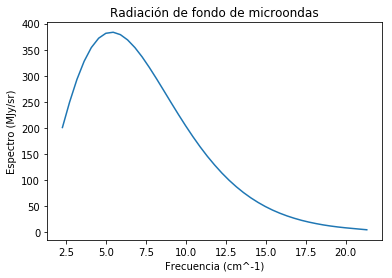

In [84]:
##Se grafican los datos del documento IRCF.txt, se grafica de color morado
plt.errorbar(Frecuencia,Espectro,yerr=Incertidumbre)
##Nombro a mis coordenadas (x,y) y mi gráfica
plt.title ('Radiación de fondo de microondas') 
plt.xlabel('Frecuencia (cm^-1)') 
plt.ylabel('Espectro (MJy/sr)')
##Se coloca el título de la gráfica
##plt.title("Radiación del fondo de microondas")

In [85]:
##Defino mi función para calcular la Intensidad en función a la frecuencia y la temperatura
def I(Frecuencia,T):
    F=Frecuencia*c*10**2
    return((h*pow(F,3)))/(pow(c,2))*(1/((np.exp((h*F)/(k*T)))-1))*(10**26)

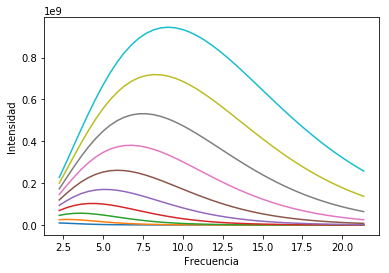

In [86]:
#Se abre un ciclo for limitado por los valores de T que es la temperatura
for i in range(len(T)):
    x=0
    ##Se indica que la intensidad usará los valores de la frecuencia y el ciclo for de la temperatura
    res=I(Frecuencia,T[i])
    
    ##Se abre un cilco limitado por los valores del Intertidumbre
    for j in range (len(Incertidumbre)):
        error[j]=((res[j]-res[j])/Incertidumbre[j])**2
        x=x+error[j]
       
    ##Condición que indica que si la x de error es mayor que la x entonces los valores de T se guardarán en treal que es la temperatura
    if (x<xg):
        xg=x
        t_universo=T[i]
    
    ##Se grafica la Frecencia respecto al valor de la Intensidad 10 veces
    if (i%10==0):
        plt.plot(Frecuencia,res)
        ##Se nombran los ejes de x,y
        plt.xlabel('Frecuencia')
        plt.ylabel('Intensidad')
        